<a href="https://colab.research.google.com/github/eduardoscovino/beer_consumption/blob/main/Beer_Consumption_A_statistical_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração do ambiente

In [ ]:
import kagglehub

# kagglehub.login()

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("dongeorge/beer-consumption-sao-paulo")

files = os.listdir(path)

csv_file = [f for f in files if f.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)

df = pd.read_csv(csv_path)
df = df[~df['Data'].isna()]
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


# Análise Preliminar e Tratamento

## Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 30.9+ KB


In [ ]:
df['Data'] = pd.to_datetime(df['Data'])
df["mes"] = df["Data"].dt.month

df["sin_mes"] = np.sin(2 * np.pi * df["mes"] / 12)
df["cos_mes"] = np.cos(2 * np.pi * df["mes"] / 12)

df.set_index('Data', inplace=True)

## Data Types

In [ ]:
cols_to_float = ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']
df = df.replace(',', '.', regex=True)
df[cols_to_float] = df[cols_to_float].astype(float)

df = df[[
  'Temperatura Media (C)',
  'Temperatura Minima (C)',
  'Temperatura Maxima (C)',
  'Precipitacao (mm)',
  'Final de Semana',
  'sin_mes',
  'cos_mes',
  'Consumo de cerveja (litros)'
]]

df.columns = ['Avg_temperature', 'Min_temperature', 'Max_temperature', 'Precipitation', 'Wknd', 'sin_month', 'cos_month', 'Beer_consumption']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg_temperature   365 non-null    float64
 1   Min_temperature   365 non-null    float64
 2   Max_temperature   365 non-null    float64
 3   Precipitation     365 non-null    float64
 4   Wknd              365 non-null    float64
 5   sin_month         365 non-null    float64
 6   cos_month         365 non-null    float64
 7   Beer_consumption  365 non-null    float64
dtypes: float64(8)
memory usage: 25.7 KB


# Inferências Estatísticas

In [ ]:
df.describe()

,Avg_temperature,Min_temperature,Max_temperature,Precipitation,Wknd,sin_month,cos_month,Beer_consumption
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02,3.650000e+02,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,-5.381100e-03,-2.372672e-03,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,7.066004e-01,7.095269e-01,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,-8.660254e-01,-8.660254e-01,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,-2.449294e-16,-1.836970e-16,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,5.000000e-01,8.660254e-01,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,1.000000e+00,1.000000e+00,37.937000


## Modelo inicial

In [ ]:
import statsmodels.formula.api as smf

res = smf.ols(formula = "Beer_consumption ~ Avg_temperature + Min_temperature + Max_temperature + Precipitation + C(Wknd) + sin_month + cos_month",
              data=df).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Beer_consumption   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     139.1
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           5.96e-98
Time:                        21:21:13   Log-Likelihood:                -817.99
No. Observations:                 365   AIC:                             1652.
Df Residuals:                     357   BIC:                             1683.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4791      1.317     

Variáveis que aparentam ser pouco relevantes:


*   Avg_temperature
*   Min_temperature
*   cos_month

Vamos verificar se há colinearidade entre as variáveis.



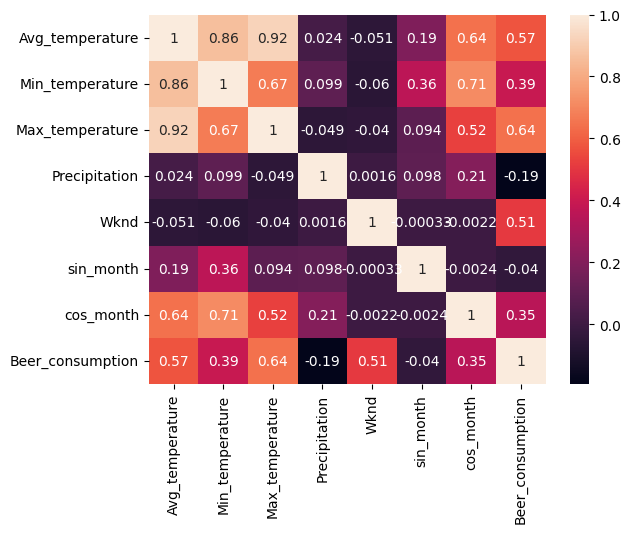

In [ ]:
sns.heatmap(df.corr(), annot=True);

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df
X = add_constant(X)

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif.sort_values('VIF', ascending=False))

            Feature         VIF
0             const  127.669824
1   Avg_temperature   24.420337
3   Max_temperature   12.937036
2   Min_temperature    9.239633
8  Beer_consumption    3.727887
7         cos_month    2.576446
5              Wknd    2.069143
6         sin_month    1.493634
4     Precipitation    1.210056


Interpretação do VIF

* VIF ≈ 1: Sem multicolinearidade.
* VIF > 5: Indica possível multicolinearidade moderada.
* VIF > 10: Indica alta multicolinearidade, o que geralmente é problemático.

Pela minha análise, parece que as colunas Temperatura_maxima, Temperatura_minima e Temperatura_media possum uma alta colinearidade um tanto quanto problemática.

Minha estratégia:

* Remover cos_mes, pois apesar do baixo VIF, tem p-valor ruim. Apenas o sen_mes já é suficiente para a variável do mês
* Sobre as temperaturas, pensei em comparar modelos com:
1. Average temperature (apesar do alto p_valor, é o mais intuitivo)
2. Maximum temperature (coluna mais relevante)
3. Diferença entre a máxima e a mínima

## Avaliação do melhor modelo

In [ ]:
# modelo 1
# apenas temperatura media
res1 = smf.ols(formula = "Beer_consumption ~ Avg_temperature + Precipitation + C(Wknd) + sin_month",
              data=df).fit()

# res1.summary()

print(f"R2: {res1.rsquared}")
print("--------------------")
print(f"F-statistic: {res1.fvalue}")
print("--------------------")
print(f"AIC: {res1.aic}")
print("--------------------")
print(f"BIC: {res1.bic}")
print("--------------------")
print(f"Params: \n{res1.params}")

R2: 0.6807000571916582
--------------------
F-statistic: 191.86663363739478
--------------------
AIC: 1709.5599337655517
--------------------
BIC: 1729.0594205334642
--------------------
Params: 
Intercept          5.636651
C(Wknd)[T.1.0]     5.240742
Avg_temperature    0.877580
Precipitation     -0.069499
sin_month         -0.890592
dtype: float64


In [ ]:
# modelo 2
# apenas temperatura maxima
res2 = smf.ols(formula = "Beer_consumption ~ Max_temperature + Precipitation + C(Wknd) + sin_month",
              data=df).fit()

# res1.summary()

print(f"R2: {res2.rsquared}")
print("--------------------")
print(f"F-statistic: {res2.fvalue}")
print("--------------------")
print(f"AIC: {res2.aic}")
print("--------------------")
print(f"BIC: {res2.bic}")
print("--------------------")
print(f"Params: \n{res2.params}")

R2: 0.7300485198475888
--------------------
F-statistic: 243.39324514608
--------------------
AIC: 1648.2805652391103
--------------------
BIC: 1667.7800520070227
--------------------
Params: 
Intercept          6.178489
C(Wknd)[T.1.0]     5.187038
Max_temperature    0.677315
Precipitation     -0.054334
sin_month         -0.541623
dtype: float64


In [ ]:
# modelo 3
# apenas temperatura media
df['Amplitude_temperature'] = df['Max_temperature'] - df['Min_temperature']
res3 = smf.ols(formula = "Beer_consumption ~ Amplitude_temperature + Precipitation + C(Wknd) + sin_month",
              data=df).fit()

# res1.summary()

print(f"R2: {res3.rsquared}")
print("--------------------")
print(f"F-statistic: {res3.fvalue}")
print("--------------------")
print(f"AIC: {res3.aic}")
print("--------------------")
print(f"BIC: {res3.bic}")
print("--------------------")
print(f"Params: \n{res3.params}")

R2: 0.5467372809123561
--------------------
F-statistic: 108.56034085741207
--------------------
AIC: 1837.4343953366274
--------------------
BIC: 1856.9338821045399
--------------------
Params: 
Intercept                17.712372
C(Wknd)[T.1.0]            4.935352
Amplitude_temperature     0.711411
Precipitation            -0.043183
sin_month                 0.434591
dtype: float64


In [ ]:
# Resultados
print('Temperatura média (apesar do alto p_valor, é o mais intuitivo)')
print('--------------------------------------------------------------')
print(f"R2: {res1.rsquared}")
print("--------------------")
print(f"F-statistic: {res1.fvalue}")
print("--------------------")
print(f"AIC: {res1.aic}")
print("--------------------")
print(f"BIC: {res1.bic}")
print("--------------------")
print(f"Params: \n{res1.params}")
print('\n')
print('Temperatura máxima (coluna mais relevante)')
print('--------------------------------------------------------------')
print(f"R2: {res2.rsquared}")
print("--------------------")
print(f"F-statistic: {res2.fvalue}")
print("--------------------")
print(f"AIC: {res2.aic}")
print("--------------------")
print(f"BIC: {res2.bic}")
print("--------------------")
print(f"Params: \n{res2.params}")
print('\n')
print('Diferença entre a máxima e a mínima')
print('--------------------------------------------------------------')
print(f"R2: {res3.rsquared}")
print("--------------------")
print(f"F-statistic: {res3.fvalue}")
print("--------------------")
print(f"AIC: {res3.aic}")
print("--------------------")
print(f"BIC: {res3.bic}")
print("--------------------")
print(f"Params: \n{res3.params}")

Temperatura média (apesar do alto p_valor, é o mais intuitivo)
--------------------------------------------------------------
R2: 0.6807000571916582
--------------------
F-statistic: 191.86663363739478
--------------------
AIC: 1709.5599337655517
--------------------
BIC: 1729.0594205334642
--------------------
Params: 
Intercept          5.636651
C(Wknd)[T.1.0]     5.240742
Avg_temperature    0.877580
Precipitation     -0.069499
sin_month         -0.890592
dtype: float64


Temperatura máxima (coluna mais relevante)
--------------------------------------------------------------
R2: 0.7300485198475888
--------------------
F-statistic: 243.39324514608
--------------------
AIC: 1648.2805652391103
--------------------
BIC: 1667.7800520070227
--------------------
Params: 
Intercept          6.178489
C(Wknd)[T.1.0]     5.187038
Max_temperature    0.677315
Precipitation     -0.054334
sin_month         -0.541623
dtype: float64


Diferença entre a máxima e a mínima
-----------------------------

Prosseguiremos com o modelo 2 pelas inferências mais favoráveis.

## Erros

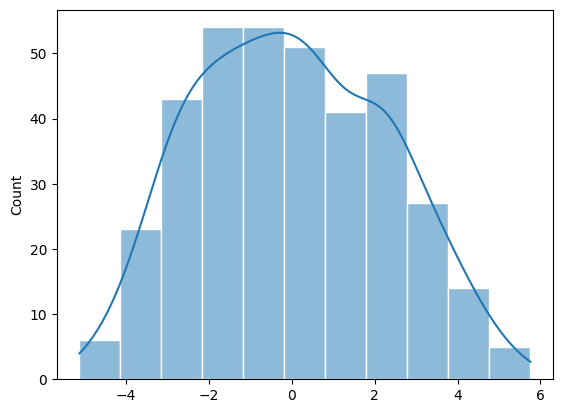

In [ ]:
predicted_consumo = res2.predict(df[['Max_temperature', 'Precipitation', 'Wknd', 'sin_month']])
residuals = df['Beer_consumption'] - predicted_consumo

sns.histplot(residuals, kde=True, edgecolor='w');

A distribuição dos resíduos parece seguir uma distribuição normal.

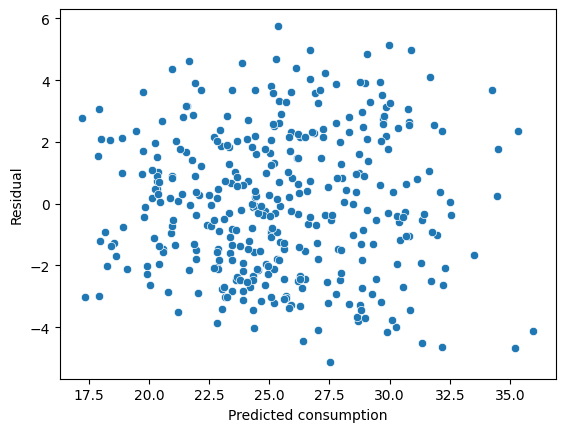

In [ ]:
sns.scatterplot(x=predicted_consumo, y=residuals);
plt.xlabel('Predicted consumption')
plt.ylabel('Residual');

Ao mesmo tempo, não há um padrão no scatter de resíduo com valor previsto. Isso indica que os resíduos estão distribuídos aleatoriamente em torno de zero, uma condição esperada para um modelo linear bem ajustado.

In [ ]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:       Beer_consumption   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     243.4
Date:                Tue, 21 Jan 2025   Prob (F-statistic):          5.67e-101
Time:                        21:24:58   Log-Likelihood:                -819.14
No. Observations:                 365   AIC:                             1648.
Df Residuals:                     360   BIC:                             1668.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.1785      0.769     

Além disso, o coeficiente de Durbin-Watson é bem próximo de 2, o que sugere que não há autocorrelação nos resíduos.

## Relação de natureza linear entre as features e a variável dependente

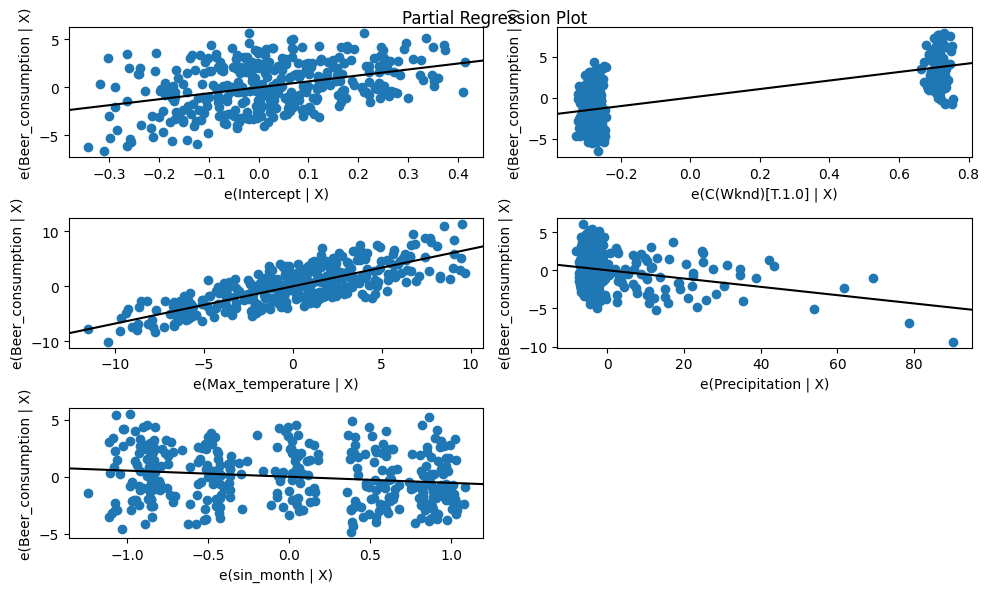

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_partregress_grid(res2, fig=fig)

# Modelagem

Agora que já temos bons indícios de que o modelo performa bem, vamos para a seguinte estratégia:

- Normalizar os dados
- Instanciar um modelo de LinearRegression() com o sklearn
- Entender qual score faz mais sentido avaliar no meu caso. Eu, particularmente, acho que o RMSE faz sentido para uma proteção contra outliers, pois o risco é ficar sem estoque de cerveja

Feito esse modelo inicial, eu partiria para alguma regulação como Ridge, Lasso ou Elastic net

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Max_temperature', 'Precipitation', 'Wknd', 'sin_month']]
y = df['Beer_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 4)
(73, 4)
(292,)
(73,)


In [ ]:
# normalizar com StandardScaler como padrão para regressões

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Modelo Inicial (benchmark)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lin_reg = LinearRegression()

cv_results = cross_validate(lin_reg, X_train_std, y_train, cv=5, scoring='neg_root_mean_squared_error')

rmse_lin_reg = cv_results['test_score'].mean()
rmse_lin_reg

-2.3332082870811948

In [ ]:
lin_reg.fit(X_train_std, y_train)

y_pred = lin_reg.predict(std.transform(X))
df['y_pred'] = y_pred

In [ ]:
lin_reg.coef_

array([ 2.94162796, -0.48038353,  2.27712824, -0.41103699])

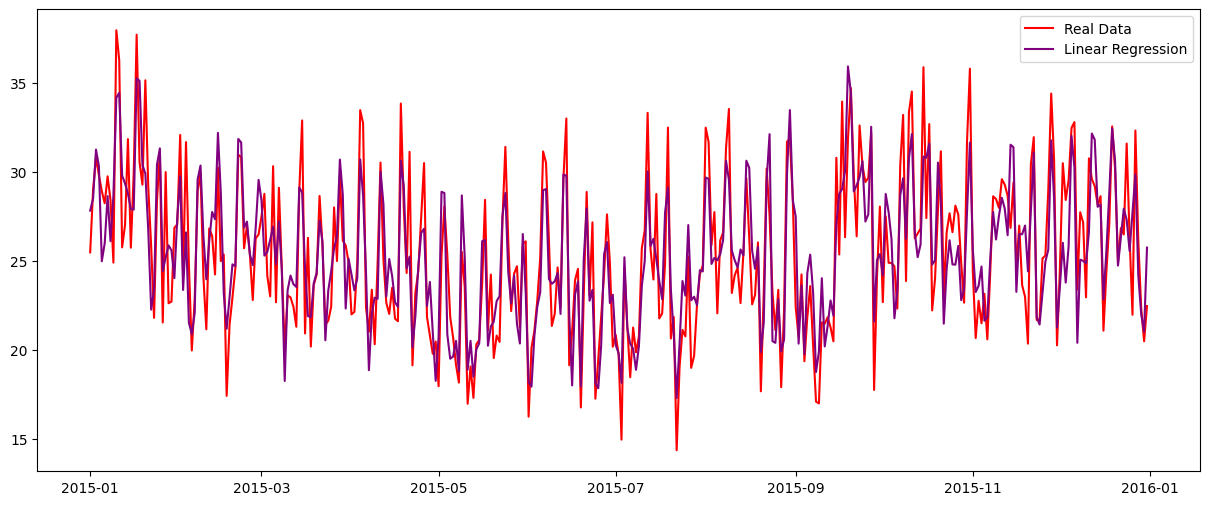

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(y, 'r-', label='Real Data')
ax.plot(df['y_pred'], 'purple', label='Linear Regression')
ax.legend()

plt.show()

## Modelos de regularização

### Ridge

Ridge é uma versão regularizada da regressão linear voltada para a redução do impacto da multicolinearidade das features.

Usamos o hiperparâmetro `alpha` para regular a força da regularização.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()

cv_results = cross_validate(ridge, X_train_std, y_train, cv=5, scoring='neg_root_mean_squared_error')

rmse_ridge = cv_results['test_score'].mean()
rmse_ridge

-2.3330924507049096

### Lasso

Lasso é voltada para selecionar um subconjunto de variáveis importantes, pois zera coeficientes de variáveis menos relevantes.

Também recebe o hiperparâmetro `alpha` do Ridge.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

cv_results = cross_validate(lasso, X_train_std, y_train, cv=5, scoring='neg_root_mean_squared_error')

rmse_lasso = cv_results['test_score'].mean()
rmse_lasso

-2.8187357360397636

### Elastic Net

Elastic Net é o meio termo entre o Ridge e o Lasso, pois é uma combinação de ambos controlada pelo hiperparâmetro `r`, além do `alpha`.

In [ ]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet()

cv_results = cross_validate(e_net, X_train_std, y_train, cv=5, scoring='neg_root_mean_squared_error')

rmse_e_net = cv_results['test_score'].mean()
rmse_e_net

-2.9498280389733216

## Grid Search

O Ridge parece um pouco melhor com os hiperparâmetros padrões.

Vamos para o GridSearch do hiperparâmetro `alpha`.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 10)  # Tests values of alpha between 0.001 e 1000
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['ridge__alpha']
rmse_best_model = grid_search.best_score_

print(f"Best alpha value: {best_alpha}")
print(f"Best score (neg_root_mean_squared_error): {rmse_best_model}")

# Evaluates the best model with the testing dataset
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE in the testing dataset: {rmse}")

Best alpha value: 2.154434690031882
Best score (neg_root_mean_squared_error): -2.3329648298002064
RMSE in the testing dataset: 2.374012376823526


In [ ]:
# Creates the DataFrame
results = {
    "Linear Regression": rmse_lin_reg,
    "Ridge": rmse_ridge,
    "Lasso": rmse_lasso,
    "Elastic Net": rmse_e_net,
    "Best Model (Ridge + GridSearch)": rmse_best_model
}

df_results = pd.DataFrame([results]).T
df_results.columns = ['rmse']
df_results.sort_values(by='rmse', ascending=False)

,rmse
Best Model (Ridge + GridSearch),-2.332965
Ridge,-2.333092
Linear Regression,-2.333208
Lasso,-2.818736
Elastic Net,-2.949828


Interpretação:

Faz sentido que o Ridge otimizado tenha uma melhor performance, pois vimos haver uma alta colinearidade na variável da temperatura máxima. Inclusive, justamente por isso retiramos as temperaturas média e mínima das variáveis do modelo.

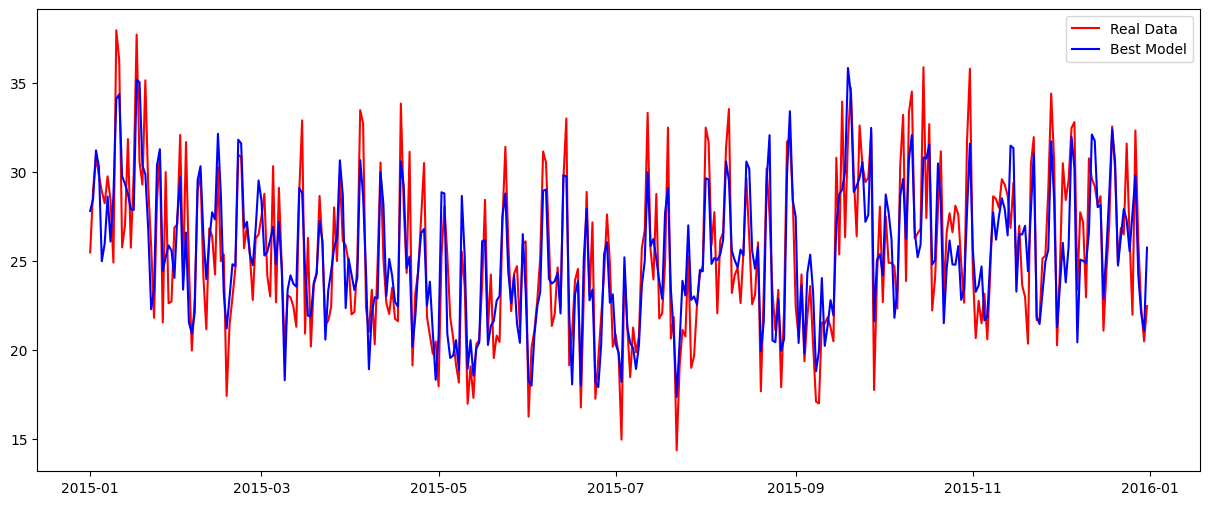

In [ ]:
best_model.fit(X_train_std, y_train)

y_pred = best_model.predict(std.transform(X))
df['y_pred'] = y_pred

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(y, 'r-', label='Real Data')
# ax.plot(X, y.mean(), 'r--', label='Average')
ax.plot(df['y_pred'], '-b', label='Best Model')
ax.legend()

plt.show()